# Phonology Feature Sets Examples

In [1]:
from locator import *
%matplotlib inline

## Sample Space

- 1500 feature sets
- all phonology
- all with spectral index >= 5
- all with at least 4 features and exactly 2 phonological subareas
- all have "consonants" as one of the subareas

General statistics abuot the sample space are found here:

    https://github.com/ilay32/wals-project/blob/master/subareas.ipynb

this notebook just shows some examples from this collection.

In [2]:
groups = pd.read_pickle('feature-sets/1832-renewed.pkl')[:1500]

## The best One

In [91]:
g = groups[0]

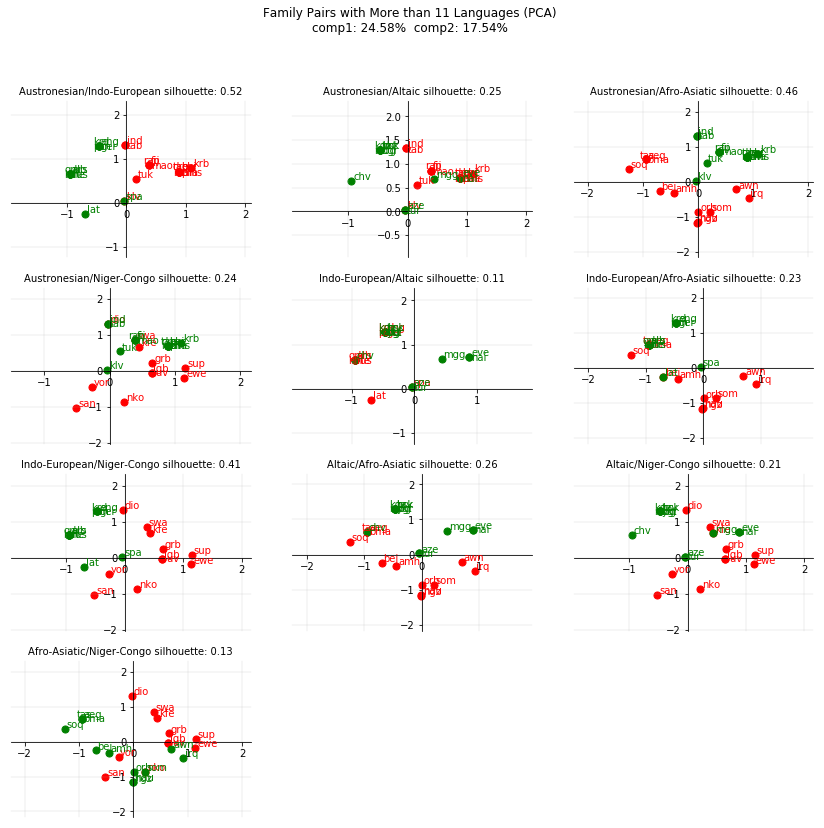

In [92]:
g.plot_multifam()

## Best by MCA

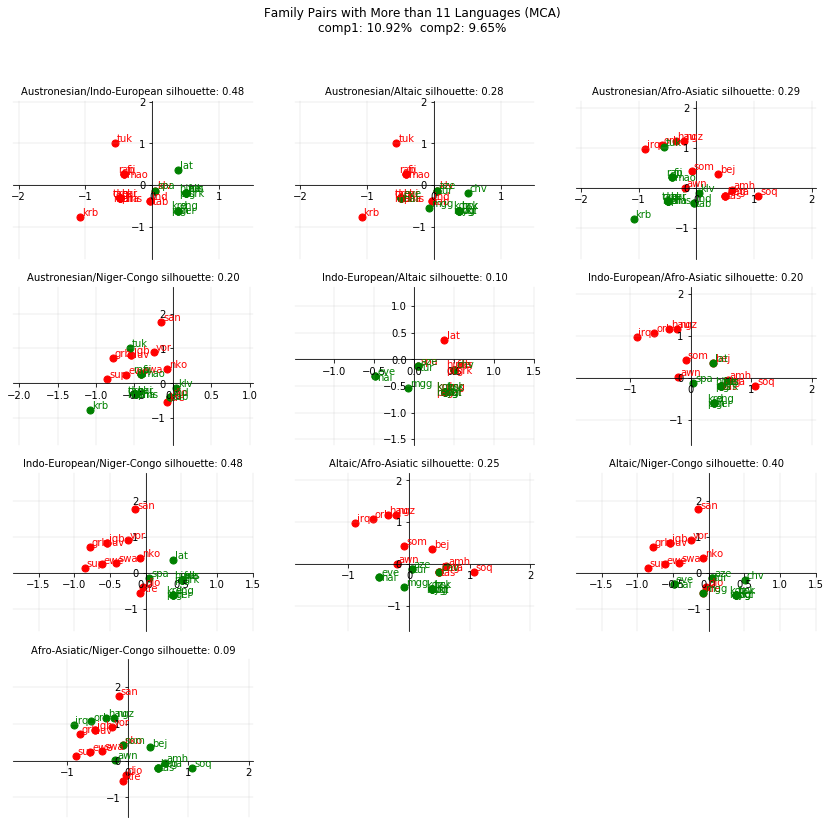

In [93]:
g.mode = 'mca'
g.plot_multifam()

## Still the best set, zoom on the pair of languages that gave the best silhouette

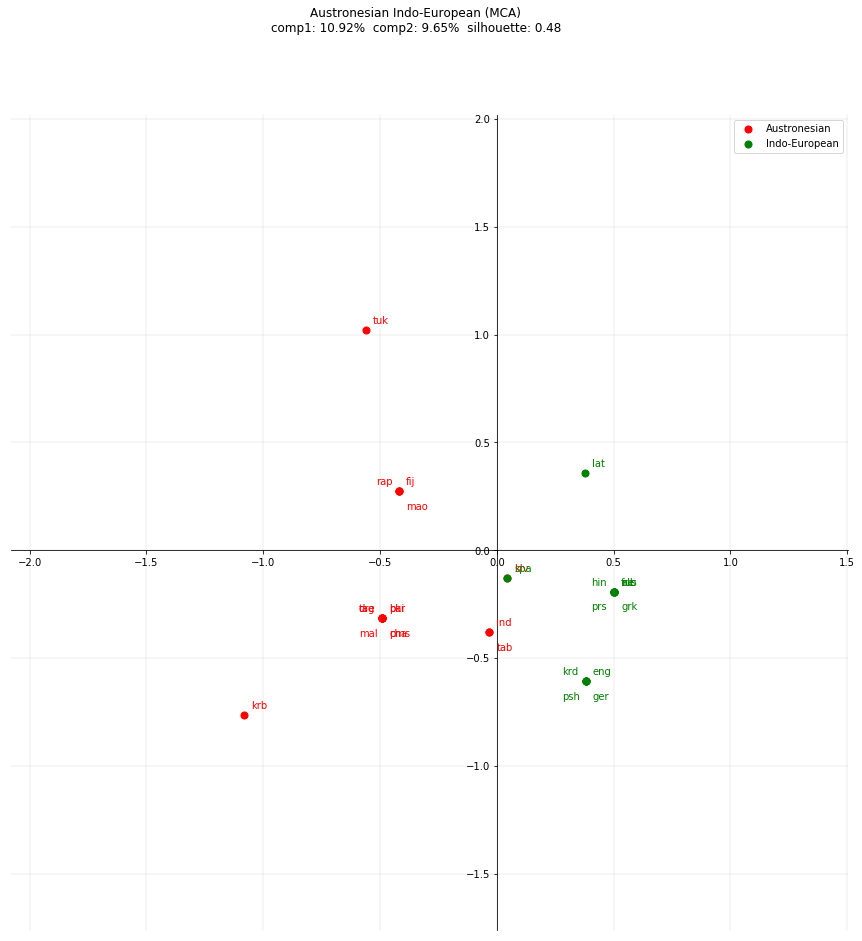

In [95]:
g.gen_separation(2)
g.gen_separation(4)
g.plot_families(['Austronesian','Indo-European'])

You may recall some talk about a 0.7 silhouette. It is there, but in 1 PC and with Austronesian and Indo-European.

In [96]:
d = g.get_table()
langs = d.loc[d['family'].isin(['Austronesian','Indo-European'])]
labels = langs['family']
points = g.projections(langs.index)[[0]]
silsc(points,labels)

0.70621297192701182

## The Second Best

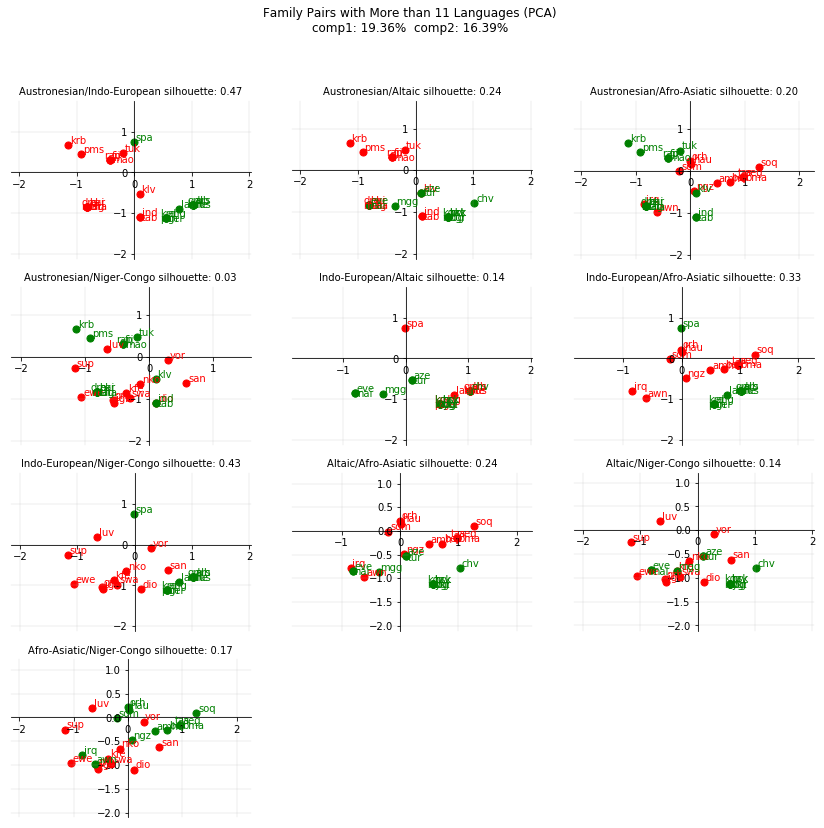

In [97]:
groups[1].plot_multifam()

## The Fifth

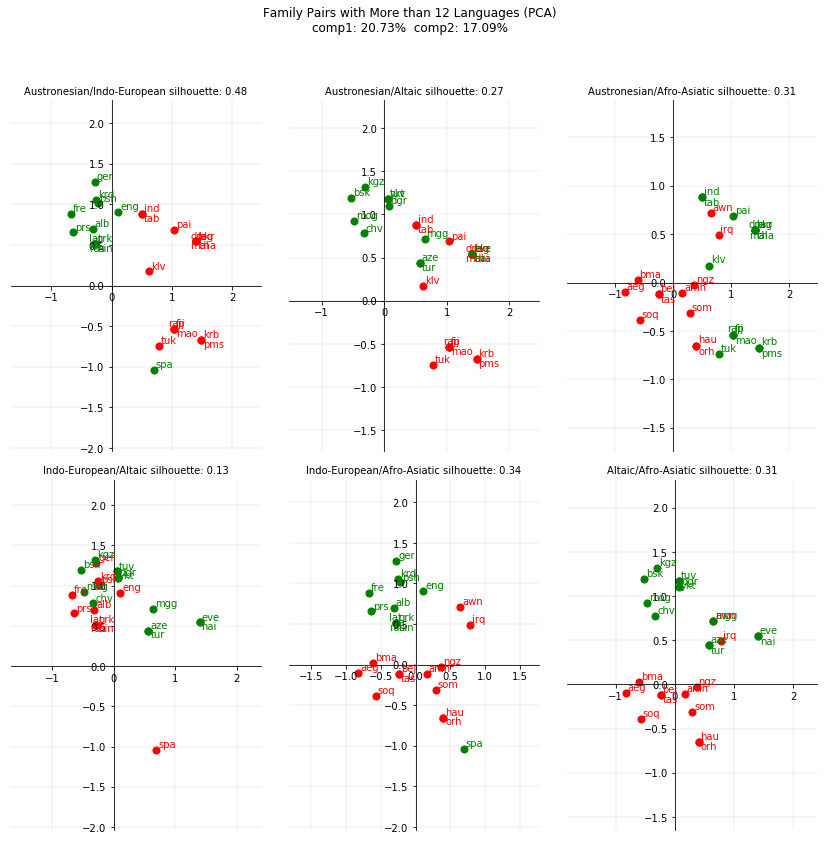

In [98]:
groups[5].plot_multifam(12)

## The one with the most languages in the top families

In [99]:
g = sorted(groups,key=lambda x: x.families.most_common(1)[0][1],reverse=True)[0]

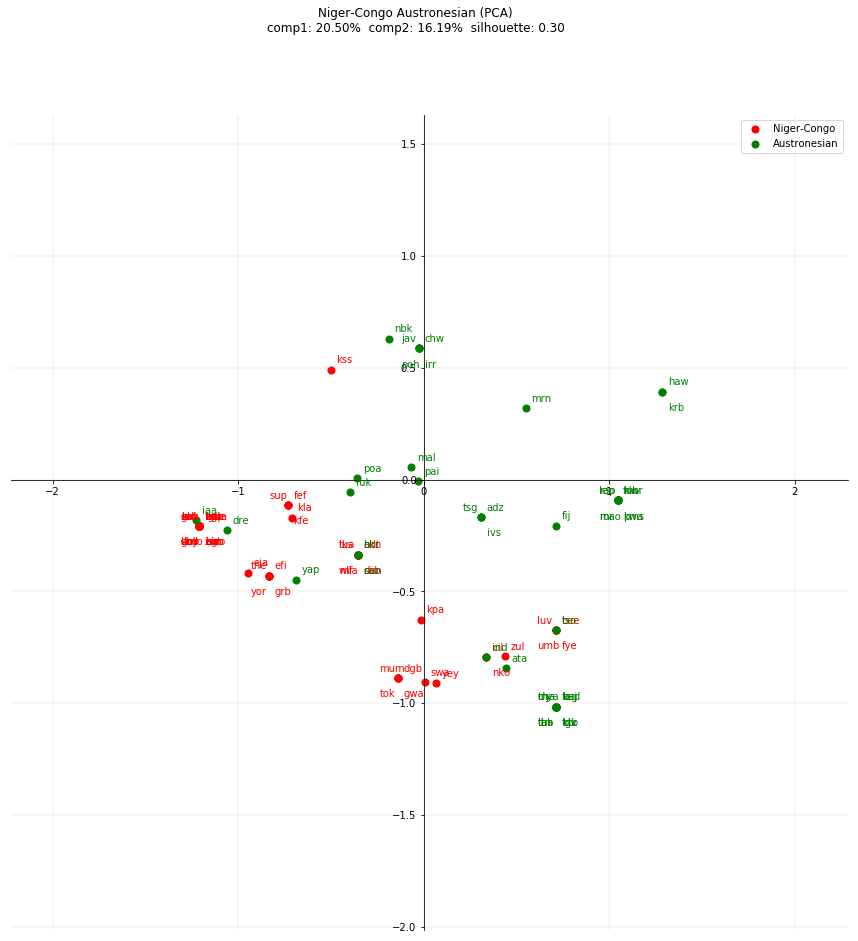

In [100]:
g.plot_families()

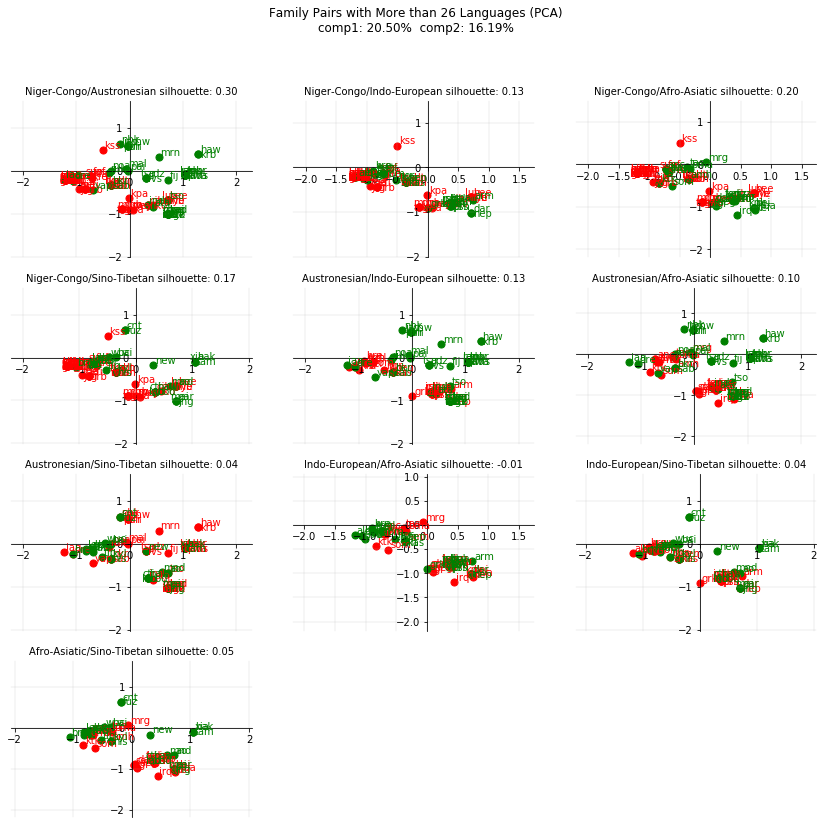

In [101]:
g.plot_multifam()

## Same Set, MCA

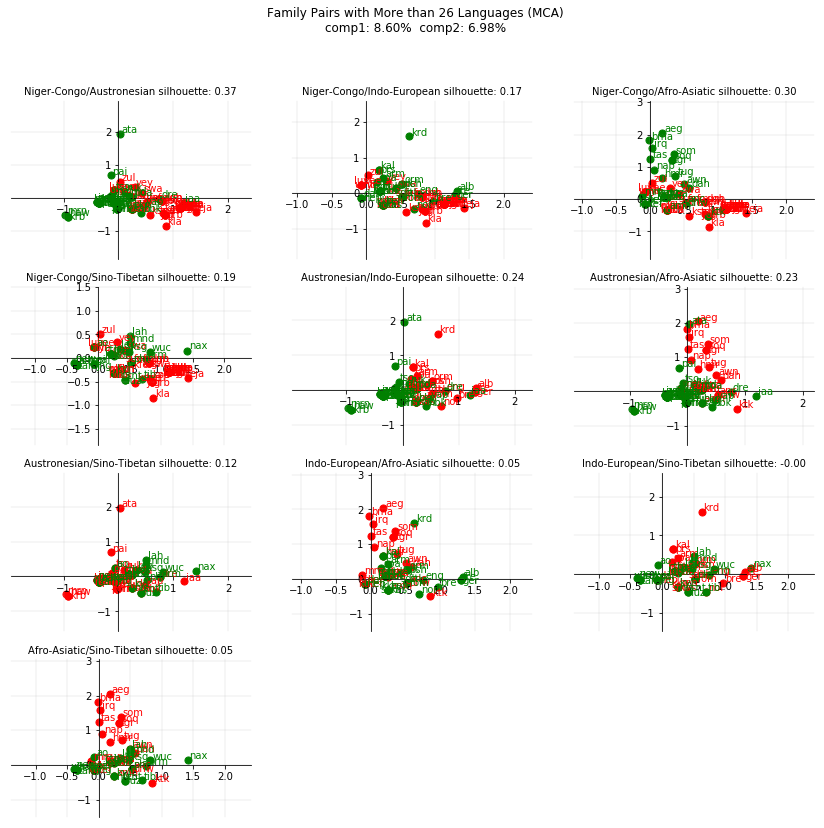

In [102]:
g.mode = 'mca'
g.plot_multifam()

## A couple of random sets

they are not from this collection of 1500 sets with good properties, but rather chosen absolutely at random from the phonological features. Only the number of features is predetermined.

In [103]:
randset1 = ColGroup([str(c) for c in np.random.choice(areas['phonology'],6)])

In [104]:
randset1.determine_spectral_data()

/usr/local/lib/python3.5/dist-packages/fbpca.py:1638: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  c = c.reshape((1, n))


In [105]:
print(randset1)

6 long group covering 184 languages
in mode PCA:
quality index: 4.42
PC1: 16%
PC2: 14%
fields: 'phonology': 6
features:
11A Front Rounded Vowels
3A Consonant-Vowel Ratio
12A Syllable Structure
19A Presence of Uncommon Consonants
15A Weight-Sensitive Stress
2A Vowel Quality Inventories
family1: 23 (Austronesian) 
family2: 17 (Indo-European) 



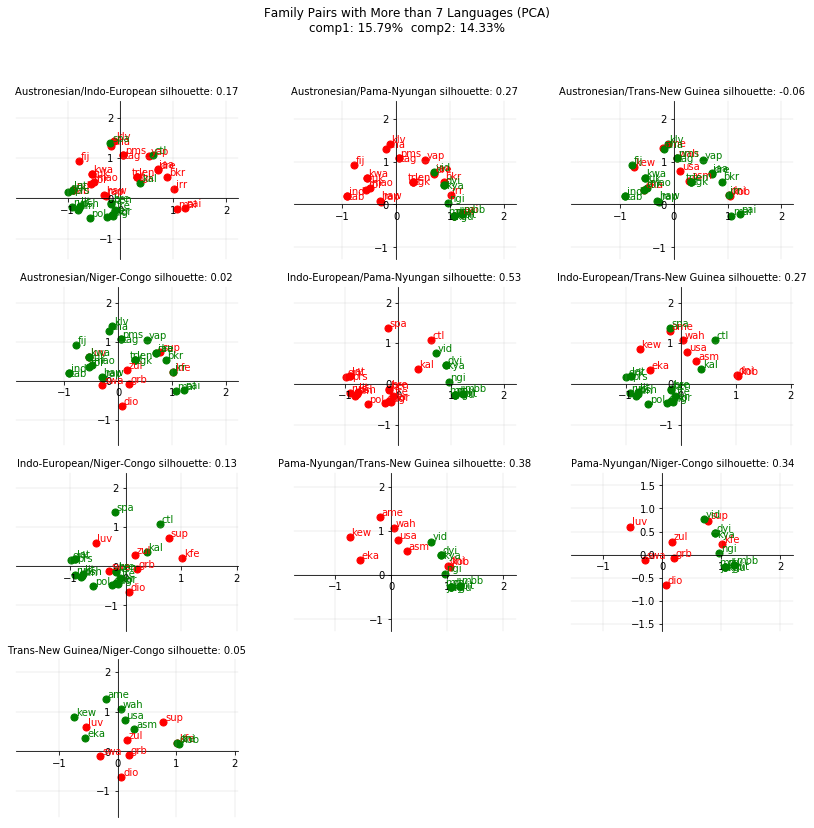

In [106]:
randset1.plot_multifam()

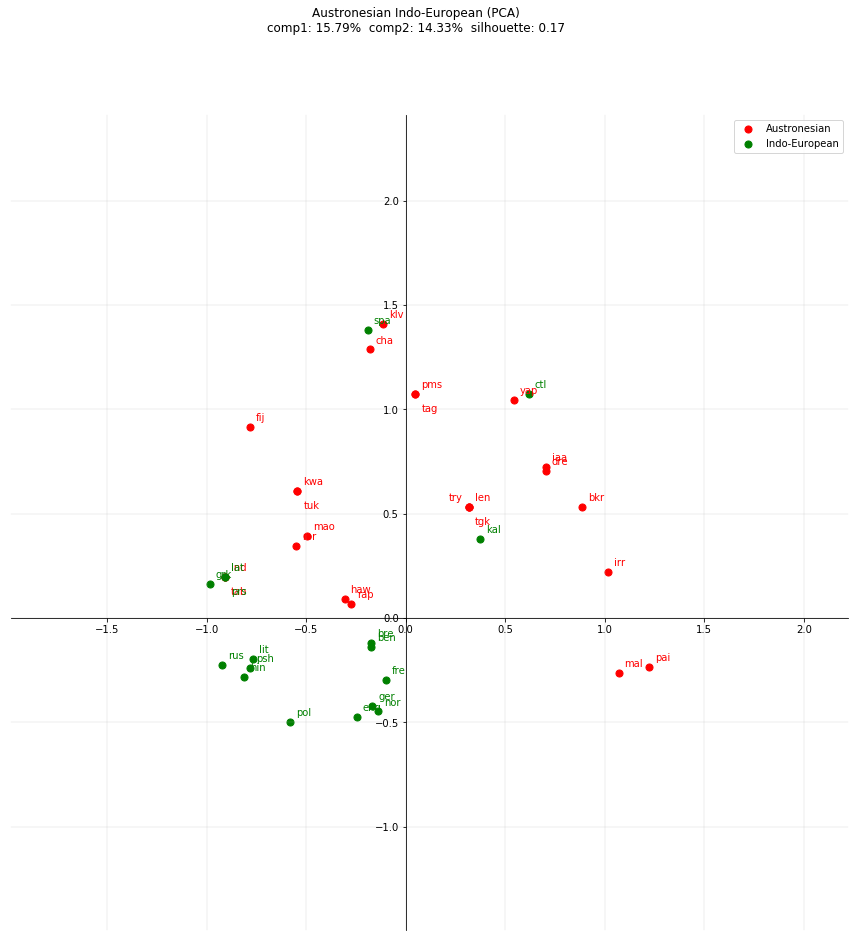

In [107]:
randset1.plot_families()

It's actually not that bad. Another one:

In [110]:
randset2 = ColGroup(np.random.choice(areas['phonology'],5))
randset2.determine_spectral_data()
print(randset2)

5 long group covering 77 languages
in mode PCA:
quality index: 5.03
PC1: 25%
PC2: 15%
fields: 'phonology': 5
features:
9A The Velar Nasal
7A Glottalized Consonants
10A Vowel Nasalization
6A Uvular Consonants
17A Rhythm Types
family1: 10 (Austronesian) 
family2: 8 (Indo-European) 



/usr/local/lib/python3.5/dist-packages/fbpca.py:1638: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  c = c.reshape((1, n))


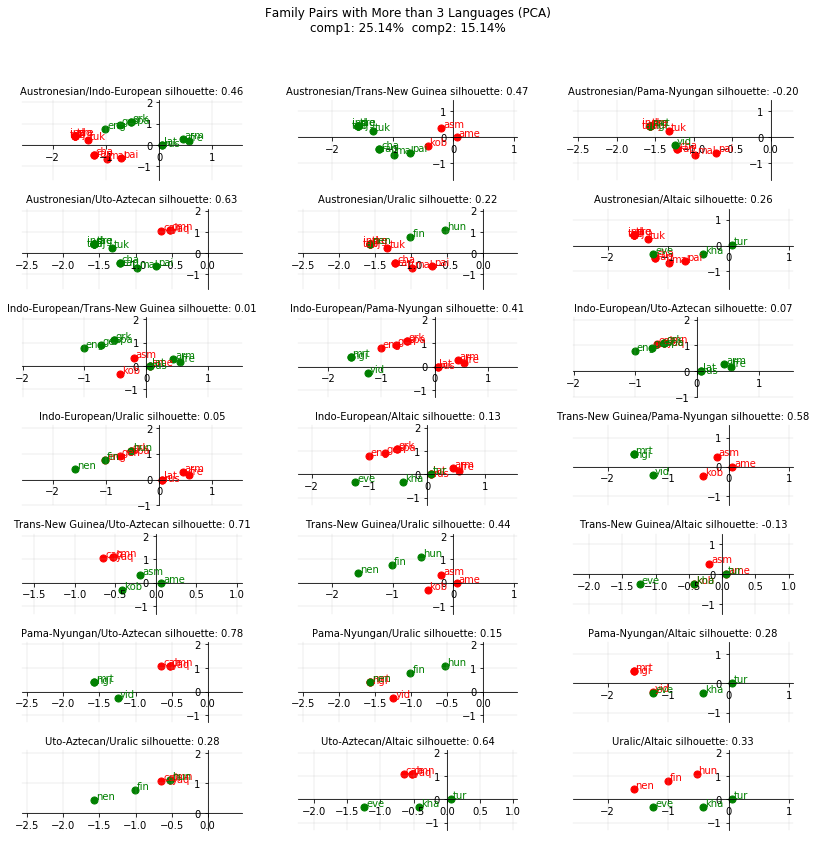

In [111]:
randset2.plot_multifam()

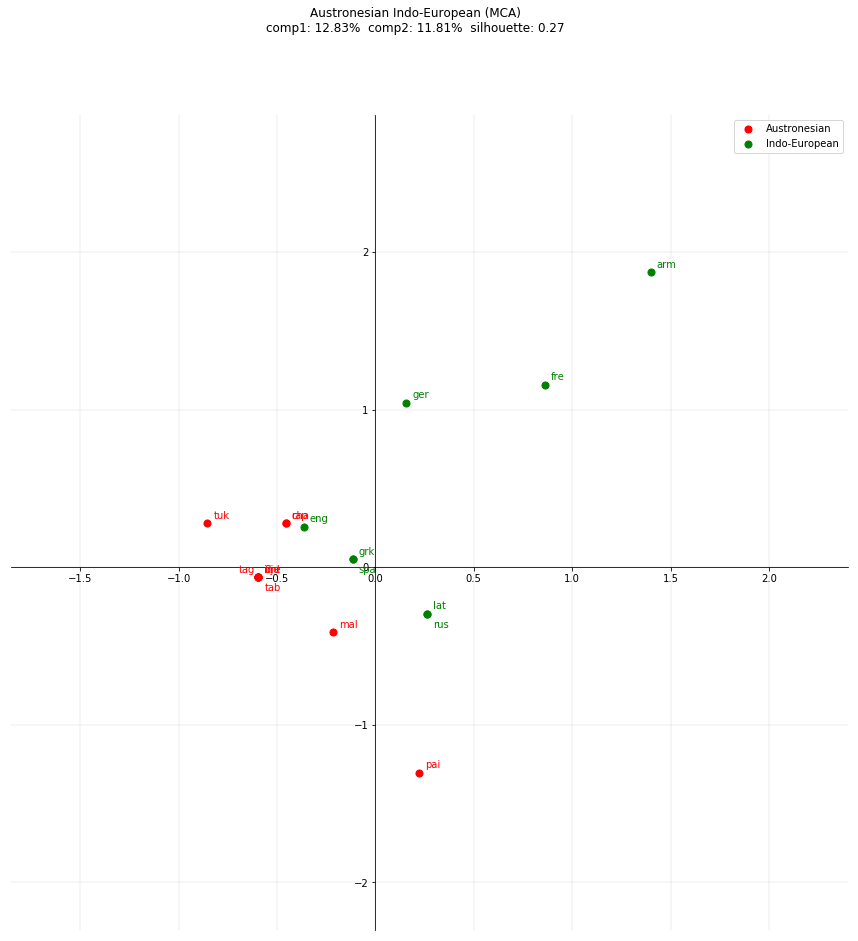

In [112]:
randset2.mode = 'mca'
randset2.plot_families()

### So 

the randomly chosen sets don't seem that bad at separating families. We'll get a more thorough look into 

this with the bogus features.

Here:
 
 https://github.com/ilay32/wals-project/blob/master/bogus-supplementary.ipynb
 
you can see some statistics about what happens when you set a bogus supplementary variable -- instead of family, some random feature.

There is still Arik's original idea of separating true supplementaries (families) by bogus features. This is a little more complicated...

### I think sets with a lot of languages in the top families and with high genetic separation are more interesting 

In [3]:
interesting = [g for g in groups if (g.families.most_common()[0][1] + g.families.most_common()[1][1]) / 2 > 40 and g.best_silhouette('genetic',2)[0] > 0.4]
interesting.sort(key=lambda x: x.best_silhouette('genetic',4)[0],reverse = True)
len(interesting)

21

Here are two examples, the best and the worst of the 21 sets found with:

    - more than 80 languages in the two dominant families (together)
    
    - silhouette (genetic, 2 clusters) higher than 0.4

best and worst, refers to the silhouette score computed on 4 clusters (that is the top four families)

In [4]:
intbest = interesting[0]
print(intbest)

5 long group covering 472 languages
in mode PCA:
quality index: 5.65
PC1: 24%
PC2: 17%
fields: 'phonology': 5
features:
12A Syllable Structure
13A Tone
19A Presence of Uncommon Consonants
6A Uvular Consonants
7A Glottalized Consonants
family1: 49 (Niger-Congo) 
family2: 38 (Austronesian) 



In [118]:
intworst = interesting[-1]
print(intworst)

6 long group covering 468 languages
in mode PCA:
quality index: 5.36
PC1: 17%
PC2: 15%
fields: 'phonology': 6
features:
12A Syllable Structure
13A Tone
18A Absence of Common Consonants
19A Presence of Uncommon Consonants
1A Consonant Inventories
7A Glottalized Consonants
family1: 49 (Niger-Congo) 
family2: 38 (Austronesian) 



/usr/local/lib/python3.5/dist-packages/fbpca.py:1638: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  c = c.reshape((1, n))


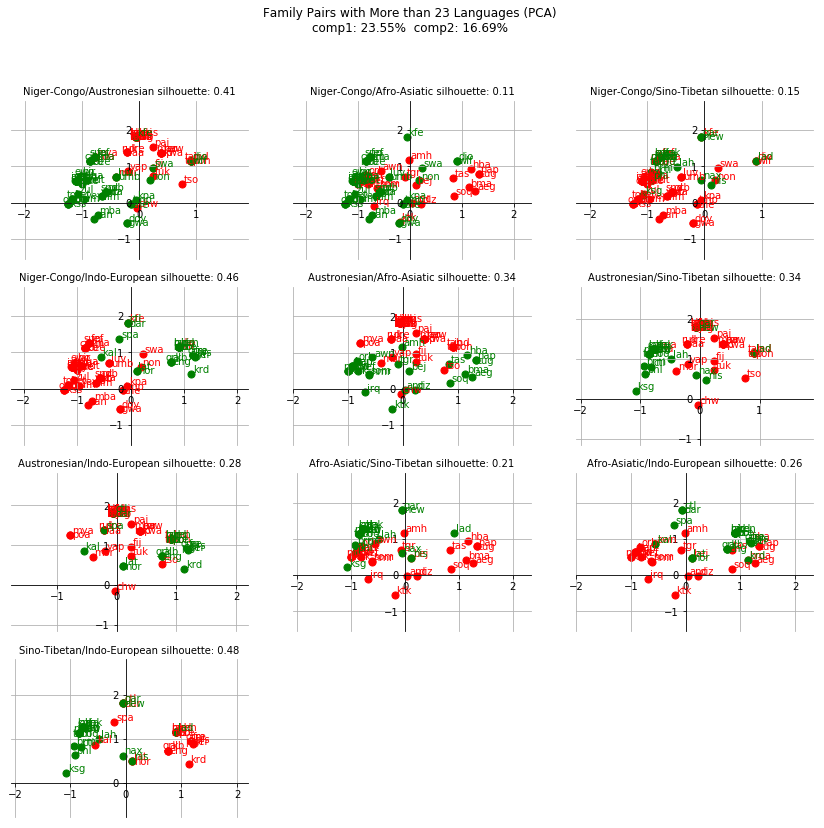

In [6]:
intbest.fmode = 'true'
intbest.plot_multifam()

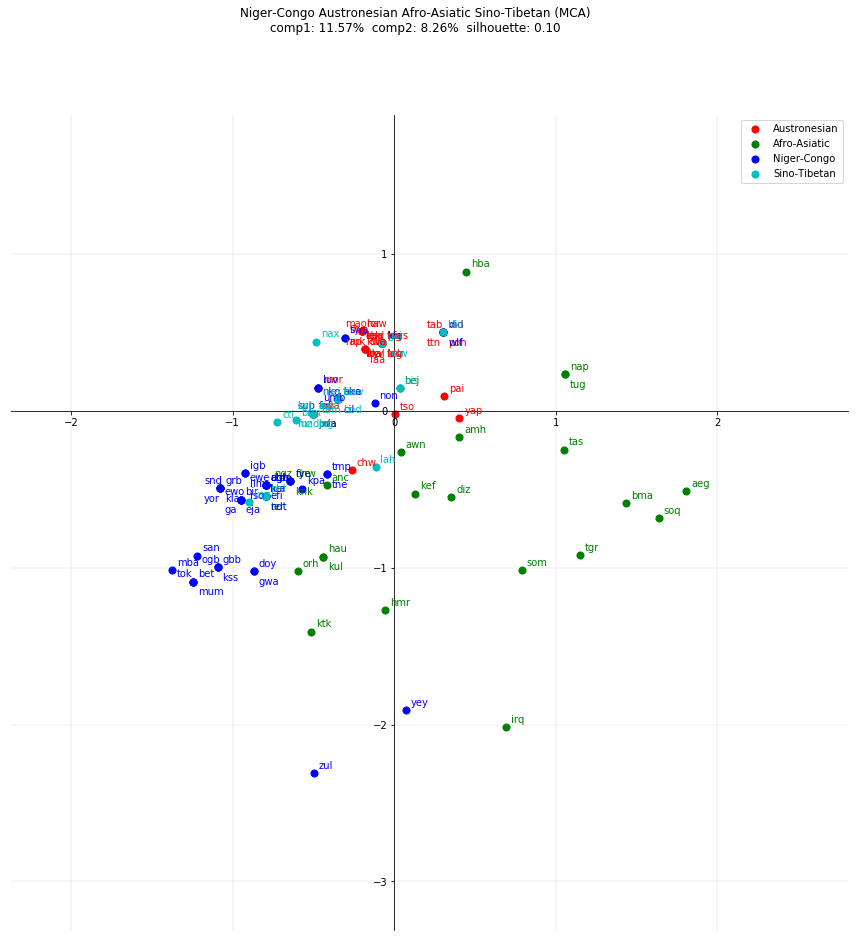

In [7]:
intbest.mode = 'mca'
intbest.plot_families(fams=['Niger-Congo','Austronesian','Afro-Asiatic','Sino-Tibetan'])

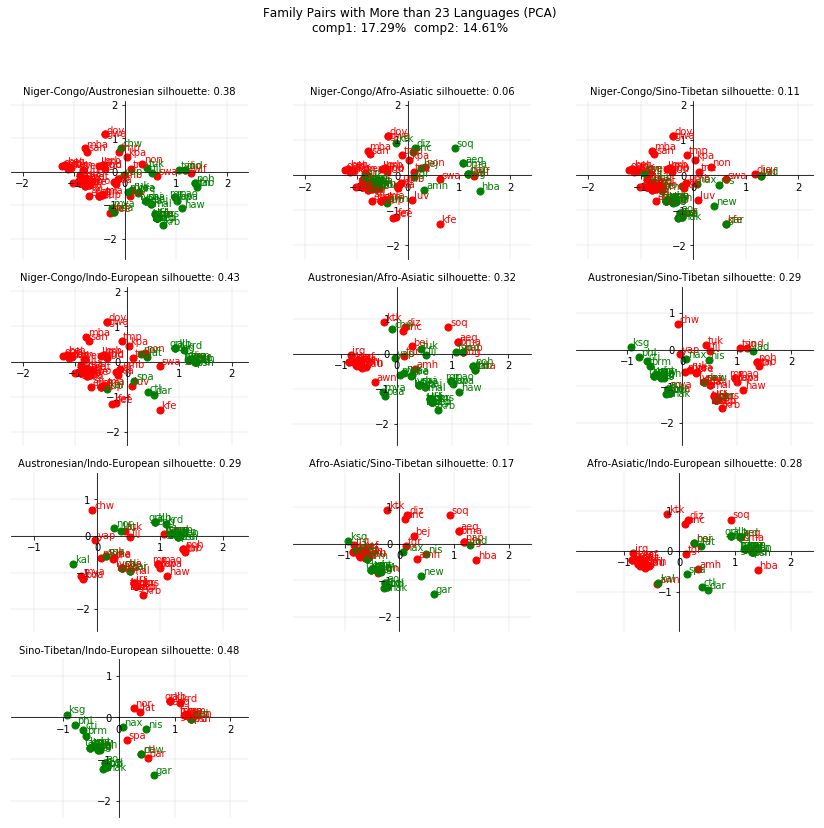

In [121]:
intworst.plot_multifam()

And with MCA it looks even better:

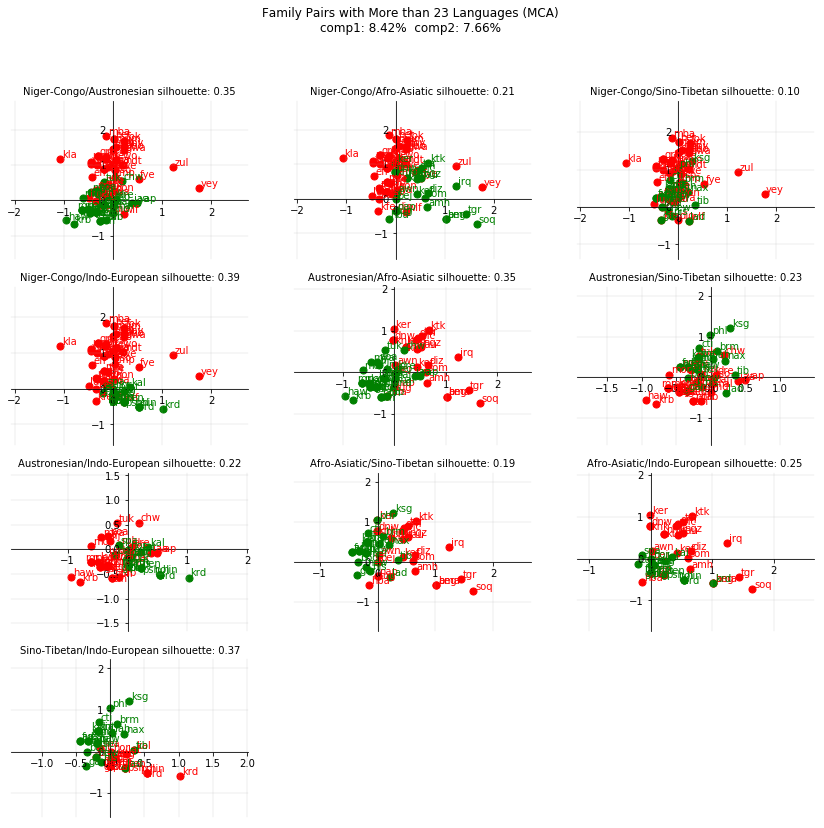

In [122]:
intworst.mode = 'mca'
intworst.plot_multifam()

So I guess we should look for sets that separate nicely not just the top 2 families.

I think two things that are interesting to check in this respect are:
    
    - correlation between the 4 clusters silhouette score and the 2 clusters one
    
    - correlation between number of languages in the top families and the silhouette score of 2 and 4 clusters

In [123]:
for g in groups:
    if 'genetic-2' not in g.silhouettes.index:
        g.mode = 'pca'
        g.determine_spectral_data()
        g.gen_separation(2)
        g.gen_separation(4)

In [124]:
gstats = list()
for g in groups:
    fams = g.families.most_common(4)
    gstats.append({
        'spectral index' : g.quality_index,
        '2clust silscore' : g.best_silhouette('genetic',2)[0],
        '4clust silscore' : g.best_silhouette('genetic',4)[0],
        'diff' : g.best_silhouette('genetic',2)[0] - g.best_silhouette('genetic',4)[0],
        'family 1' : fams[0][1],
        'family 2' : fams[1][1],
        'top4 average' : np.array([c for f,c in fams]).mean() 
    })
gstats = pd.DataFrame(gstats)

In [125]:
gstats.describe()

,2clust silscore,4clust silscore,diff,family 1,family 2,spectral index,top4 average
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.235219,0.054998,0.180221,32.434000,26.212667,6.318464,22.981667
std,0.081347,0.042415,0.069859,15.325085,11.975435,1.171174,10.612288
min,0.090073,-0.069371,0.015952,15.000000,12.000000,2.292235,12.500000
25%,0.177748,0.021698,0.144050,15.000000,14.000000,5.457913,13.500000
50%,0.211291,0.049438,0.176029,25.000000,21.000000,5.972155,16.250000
75%,0.277886,0.089045,0.209488,50.000000,39.000000,6.829360,35.000000
max,0.567871,0.184280,0.463221,54.000000,45.000000,10.650957,39.750000


### Correlation between Silhoutte score of 2 and 4 clusters (families)

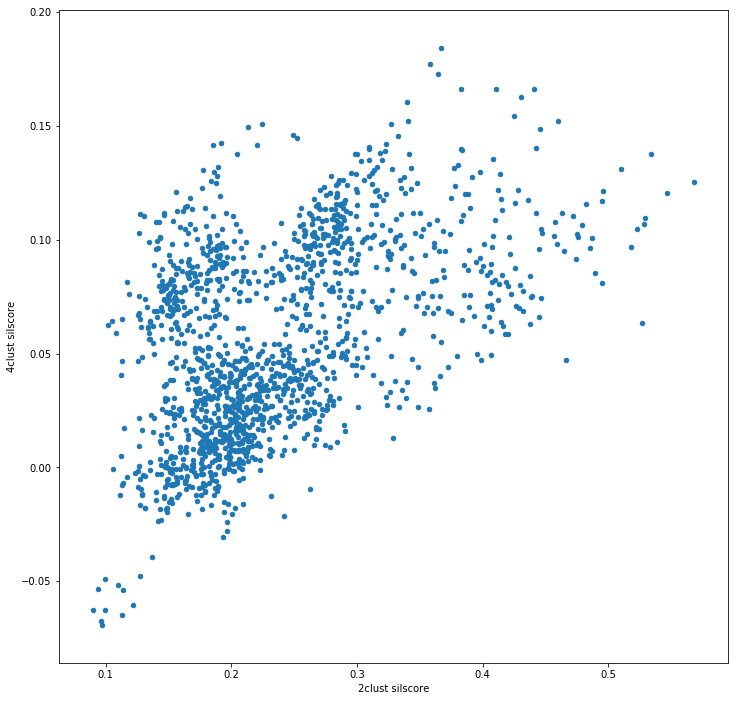

In [126]:
gstats.plot.scatter(x='2clust silscore',y='4clust silscore',figsize=(12,12))

In [127]:
from scipy.stats import spearmanr
spearmanr(gstats['2clust silscore'],gstats['4clust silscore'])

SpearmanrResult(correlation=0.48379502342124159, pvalue=7.7872617341782815e-89)

### Correlation between  Average Number of Languages in Top 4 Families and the 2/4 Silhouette Scores

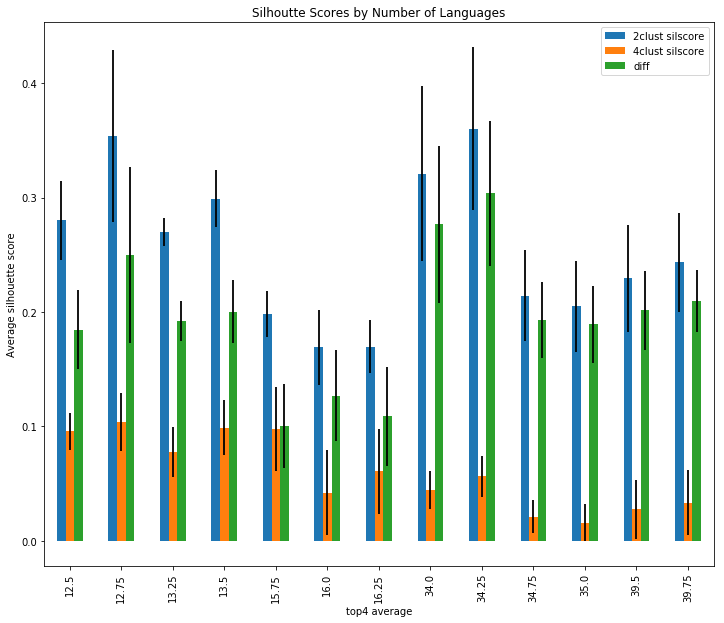

In [128]:
g2 = gstats.groupby('top4 average')['2clust silscore']
g4 = gstats.groupby('top4 average')['4clust silscore']
gd = gstats.groupby('top4 average')['diff']
means2 = g2.mean()
means4 = g4.mean()
meansd = gd.mean()
err2 = g2.std()
err4 = g4.std()
errd = gd.std()

fig,ax = plt.subplots(figsize=(12,10))

ax.set_xlabel("Average no. of languages in top 4 families")
ax.set_ylabel("Average silhouette score")
ax.set_title("Silhoutte Scores by Number of Languages")

sils = pd.DataFrame([means2,means4,meansd])
err = pd.DataFrame([err2,err4,errd])
sils.transpose().plot.bar(yerr=err.transpose(),ax=ax)

## How are the sets distributed along the average language counts:

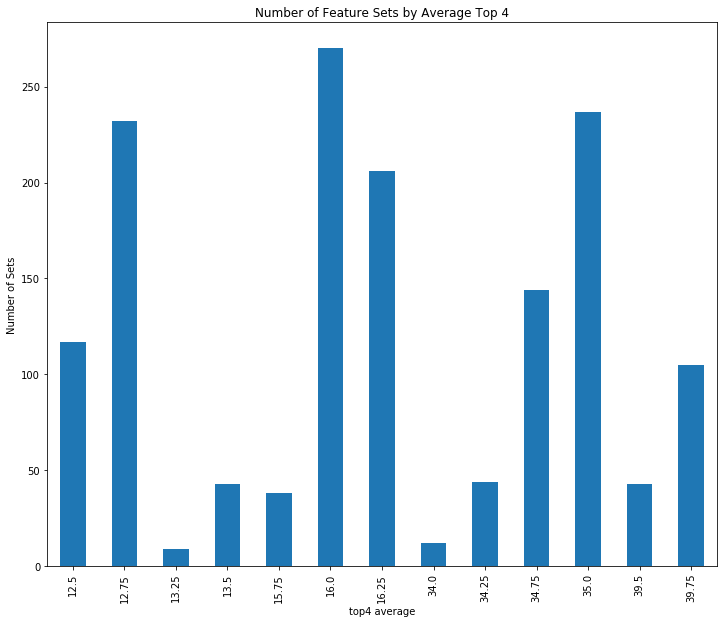

In [129]:
fig,ax = plt.subplots()
ax.set_title("Number of Feature Sets by Average Top 4")
ax.set_ylabel("Number of Sets")
counts2 = g2.count().plot.bar(figsize=(12,10),ax=ax)

# So there doesn't 
### seem to be any kind of regularity in these figures. We have to look for feature sets with high silhouette score on more than two clusters.  Preferably, I think, with high number of languages in leading families.